In [1]:
import pickle
abstracts = pickle.load(open("data/abstract.plk", "rb"))

In [2]:
len(abstracts)

4157

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [8]:
import spacy
nlp = spacy.load('en')
def get_lemma(doc):
    tokens = []
    for token in doc:
        if not token.is_punct and (not token.is_digit) and (not token.is_stop):
            if(len(token) > 2):
                tokens.append(wordnet_lemmatizer.lemmatize(str(token)))
            
    return tokens



    Only loading the 'en' tokenizer.



In [14]:
import heapq
import operator
from collections import Counter
import numpy as np


def build_tf_idf_extractor(nlp,data):
    data_len = len(data)
    print("Number of documents:",data_len)
    
    # CountVectorizer(): Convert a collection of text documents to a matrix of token counts
    cvec = CountVectorizer(stop_words='english', ngram_range=(1,1), lowercase=False,tokenizer=lambda key: get_lemma(nlp(data[key])))
    
    # transform(raw_documents): Transform documents to document-term matrix
    cvec_counts = cvec.fit_transform(list(range(0,data_len)))
    
    # TfidfTransformer(): Transform a count matrix to a normalized tf or tf-idf representation
    transformer = TfidfTransformer()
    
    transformed_weights = transformer.fit_transform(cvec_counts)

    output = Counter()
    total_words_processed = 0
    for i in range(0, data_len):
        if i % 50 == 0:
            print (i)
        weights = transformed_weights.toarray()[i]
        five_keywords = heapq.nlargest(4, enumerate(weights), key=lambda x: x[1])
        keywords_str = []
        for keyword in five_keywords:
            total_words_processed+=1
            output[str(cvec.get_feature_names()[keyword[0]]).lower()] += 1
            keywords_str.append(str(cvec.get_feature_names()[keyword[0]]).lower())
                
    print("total keywords processed:", total_words_processed)
    return output, keywords_str

In [15]:
output, keywords = build_tf_idf_extractor(nlp,abstracts[:100])

Number of documents: 100
0
50
total keywords processed: 400


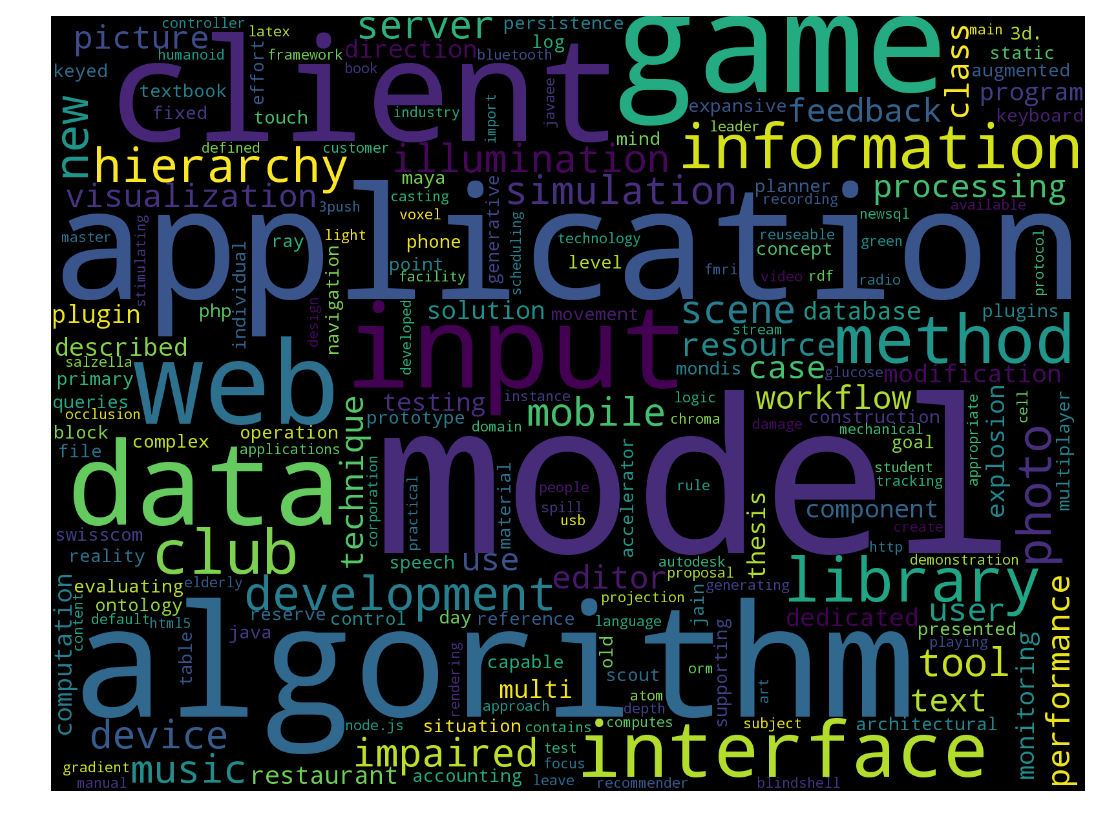

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600,height=1200).generate_from_frequencies(output)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Number of documents: 500
0
50
100
150
200
250
300
350
400
450
total keywords processed: 2000


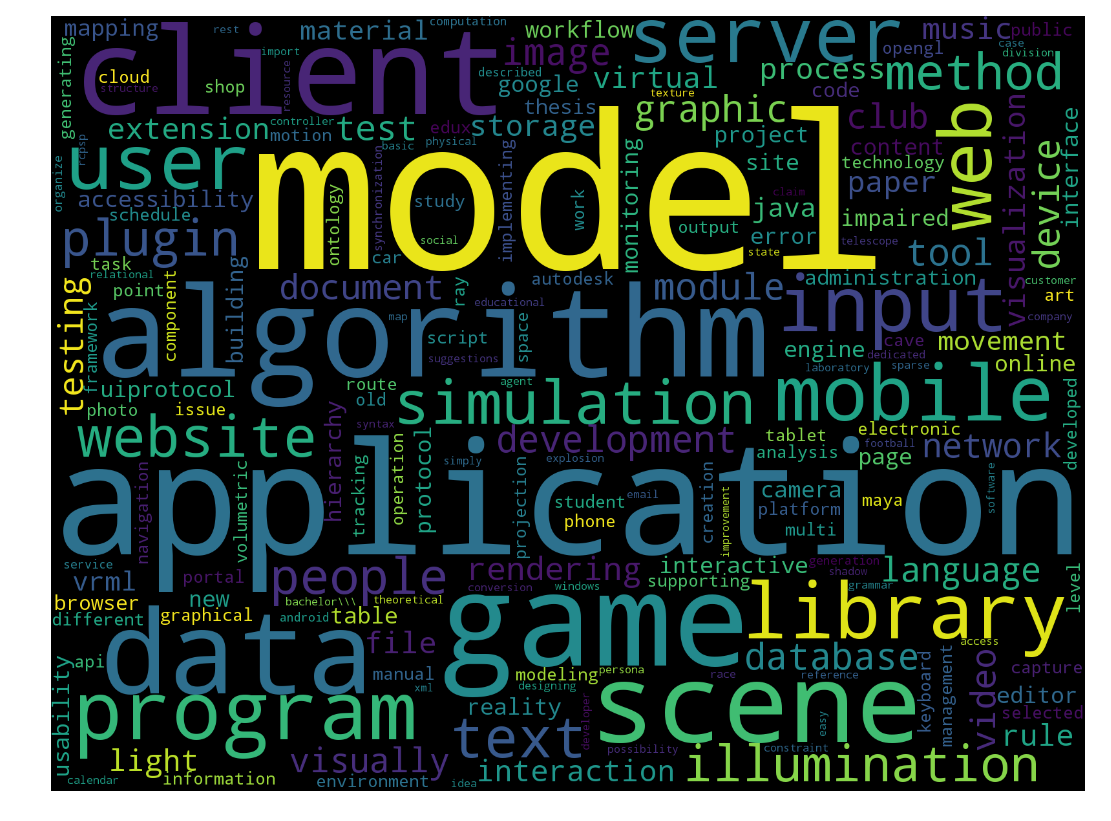

In [17]:
output, keywords = build_tf_idf_extractor(nlp,abstracts[:500])

wordcloud = WordCloud(width=1600,height=1200).generate_from_frequencies(output)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Number of documents: 1000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
total keywords processed: 4000


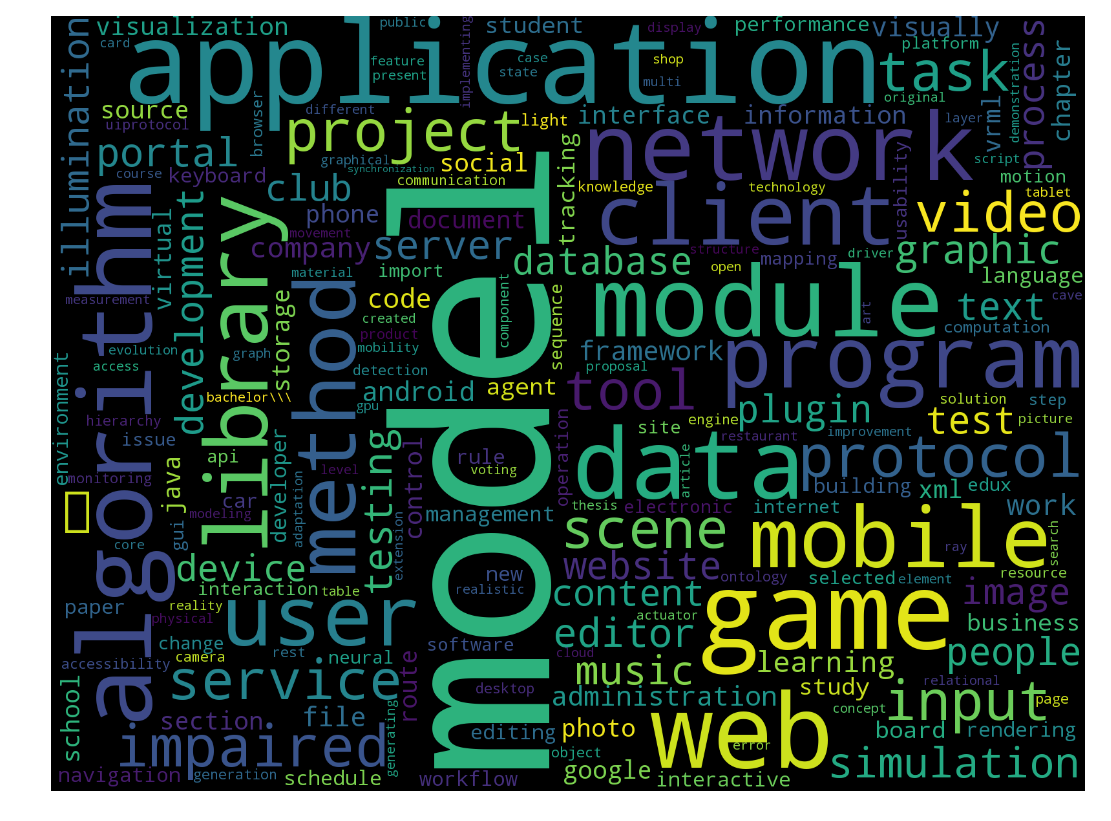

In [18]:
output, keywords = build_tf_idf_extractor(nlp,abstracts[:1000])

wordcloud = WordCloud(width=1600,height=1200).generate_from_frequencies(output)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Number of documents: 2000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
total keywords processed: 8000


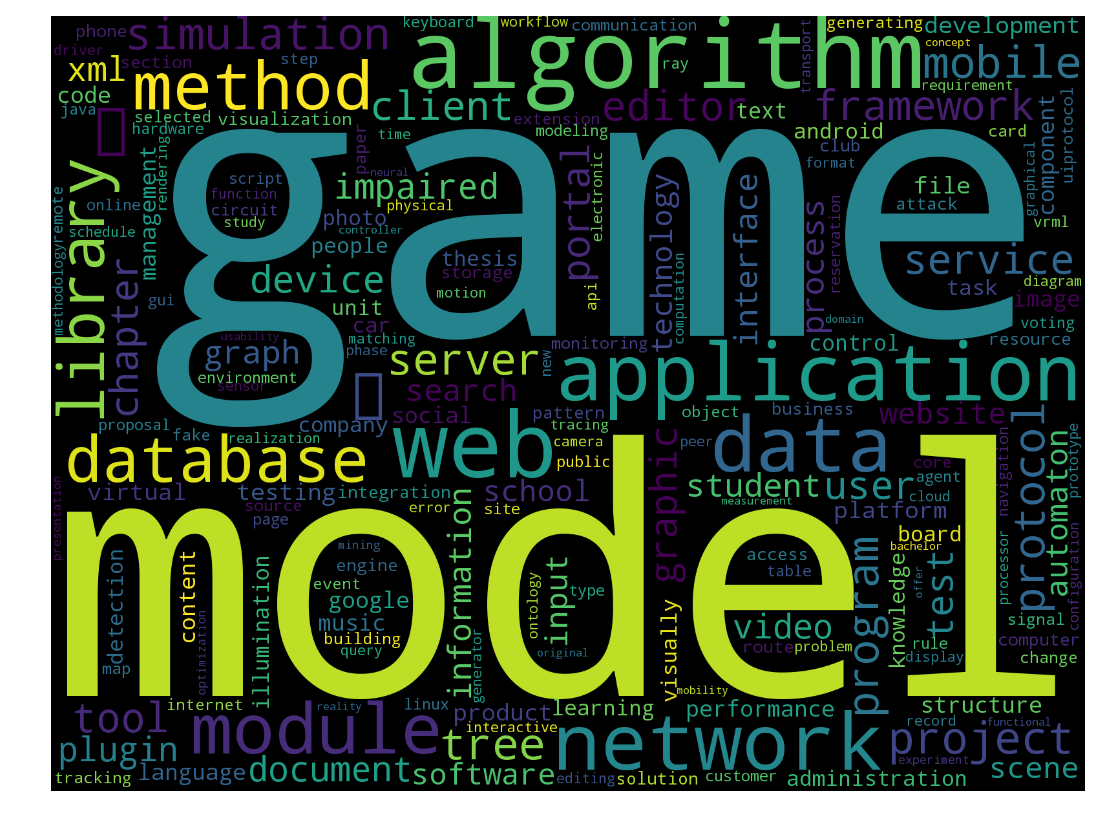

In [19]:
output, keywords = build_tf_idf_extractor(nlp,abstracts[:2000])

wordcloud = WordCloud(width=1600,height=1200).generate_from_frequencies(output)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
output, keywords = build_tf_idf_extractor(nlp,abstracts[:3000])

wordcloud = WordCloud(width=1600,height=1200).generate_from_frequencies(output)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Number of documents: 3000
0
50


KeyboardInterrupt: 